In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
%matplotlib inline

In [3]:
laptop_csv = "laptop_pricing_dataset_mod2.csv"
df = pd.read_csv(laptop_csv, header=0)
df.head(5)

,Unnamed: 0.1,Unnamed: 0,Manufacturer,Category,GPU,OS,CPU_core,Screen_Size_inch,CPU_frequency,RAM_GB,Storage_GB_SSD,Weight_pounds,Price,Price-binned,Screen-Full_HD,Screen-IPS_panel
0,0,0,Acer,4,2,1,5,14.0,0.551724,8,256,3.52800,978,Low,0,1
1,1,1,Dell,3,1,1,3,15.6,0.689655,4,256,4.85100,634,Low,1,0
2,2,2,Dell,3,1,1,7,15.6,0.931034,8,256,4.85100,946,Low,1,0
3,3,3,Dell,4,2,1,5,13.3,0.551724,8,128,2.69010,1244,Low,0,1
4,4,4,HP,4,2,1,7,15.6,0.620690,8,256,4.21155,837,Low,1,0


<Axes: xlabel='CPU_frequency', ylabel='Price'>

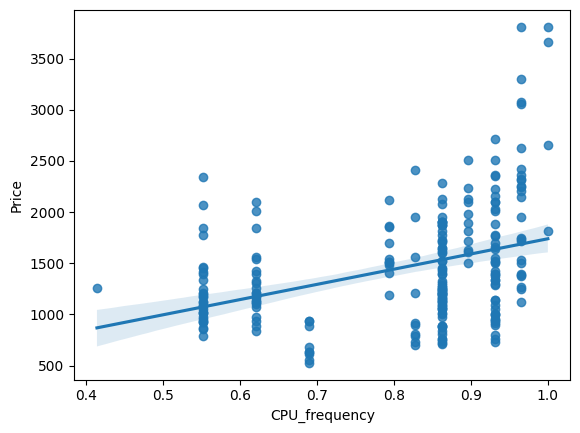

In [4]:
sns.regplot(x="CPU_frequency", y="Price", data=df)

In [6]:
df[["CPU_frequency", "Price"]].corr()

,CPU_frequency,Price
CPU_frequency,1.000000,0.366666
Price,0.366666,1.000000


<Axes: xlabel='Screen_Size_inch', ylabel='Price'>

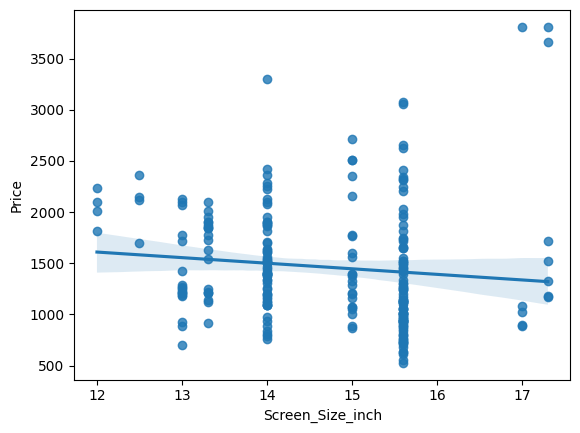

In [7]:
sns.regplot(x="Screen_Size_inch", y="Price", data=df)

In [8]:
df[["Screen_Size_inch", "Price"]].corr()

,Screen_Size_inch,Price
Screen_Size_inch,1.000000,-0.110644
Price,-0.110644,1.000000


<Axes: xlabel='Weight_pounds', ylabel='Price'>

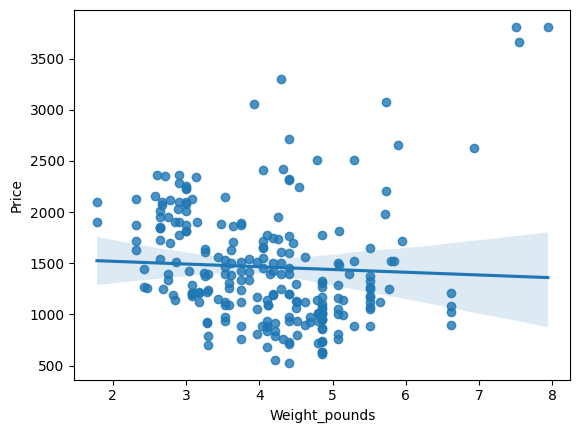

In [9]:
sns.regplot(x="Weight_pounds", y="Price", data=df)

In [10]:
df[["Weight_pounds", "Price"]].corr()

,Weight_pounds,Price
Weight_pounds,1.000000,-0.050312
Price,-0.050312,1.000000


<Axes: xlabel='Category', ylabel='Price'>

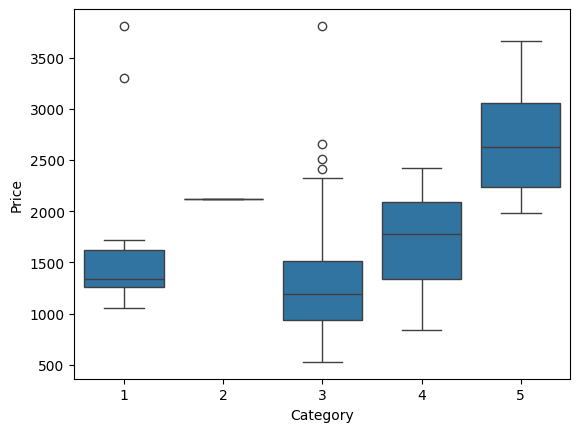

In [11]:
sns.boxplot(x="Category", y="Price", data=df)

<Axes: xlabel='GPU', ylabel='Price'>

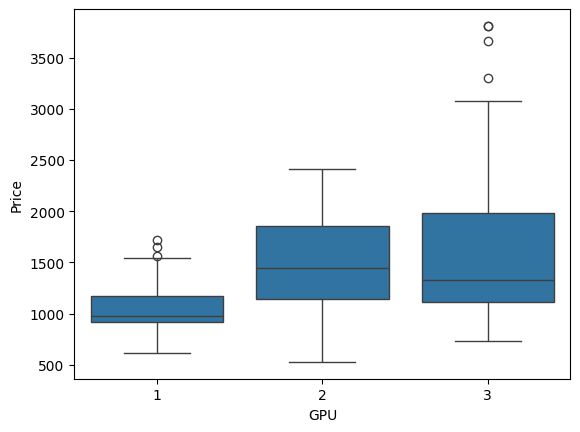

In [12]:
sns.boxplot(x="GPU", y="Price", data=df)

In [13]:
df_gptest = df[['GPU','CPU_core','Price']]
grouped_test1 = df_gptest.groupby(['GPU','CPU_core'],as_index=False).mean()
print(grouped_test1)

   GPU  CPU_core        Price
0    1         3   769.250000
1    1         5   998.500000
2    1         7  1167.941176
3    2         3   785.076923
4    2         5  1462.197674
5    2         7  1744.621622
6    3         3   784.000000
7    3         5  1220.680000
8    3         7  1945.097561


In [14]:
grouped_pivot = grouped_test1.pivot(index='GPU',columns='CPU_core')
print(grouped_pivot)

               Price                          
CPU_core           3            5            7
GPU                                           
1         769.250000   998.500000  1167.941176
2         785.076923  1462.197674  1744.621622
3         784.000000  1220.680000  1945.097561


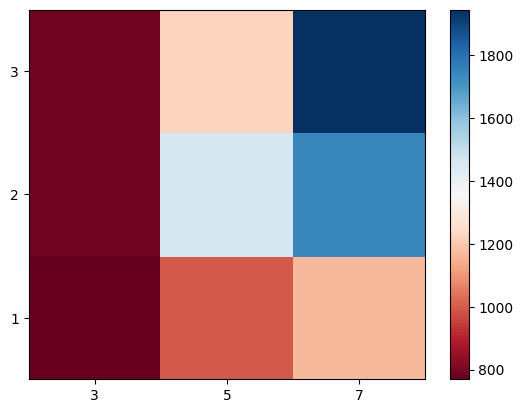

In [15]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

#label names
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

#move ticks and labels to the center
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

#insert labels
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

fig.colorbar(im)